# **Libraries Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import warnings

# **Read Dataset**

In [ ]:
df = pd.read_csv('/content/Loan Prediction Dataset.csv')

# **Preprocessing Steps**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Visualization Of Loan Dataset**

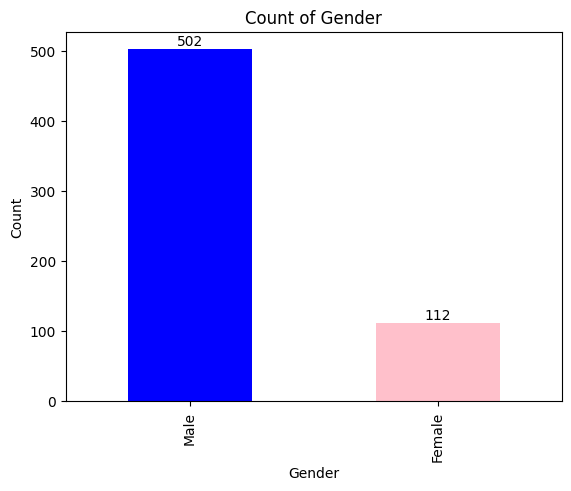

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender category
gender_counts = df['Gender'].value_counts()

gender_counts.plot(kind='bar', color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')

for i, count in enumerate(gender_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()


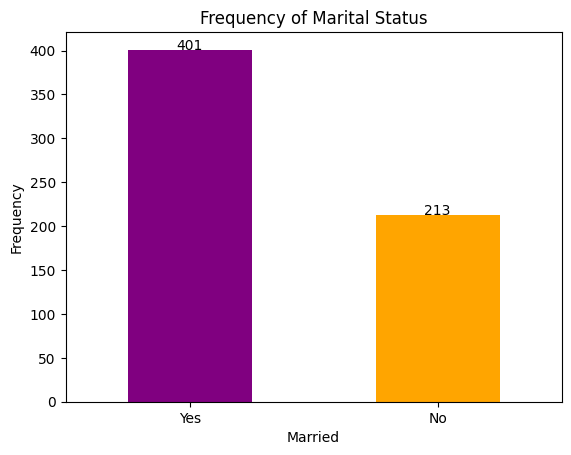

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each category in the 'Married' column
married_counts = df['Married'].value_counts()

married_counts.plot(kind='bar', color=['purple', 'orange'])

for i, count in enumerate(married_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xlabel('Married')
plt.ylabel('Frequency')
plt.title('Frequency of Marital Status')
plt.xticks(rotation=0)
plt.show()


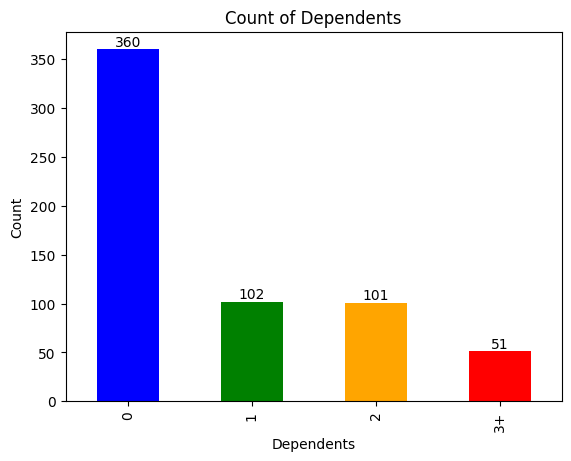

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for Dependents
dependents_counts = df['Dependents'].value_counts()

dependents_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

for i, count in enumerate(dependents_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Count of Dependents')
plt.show()


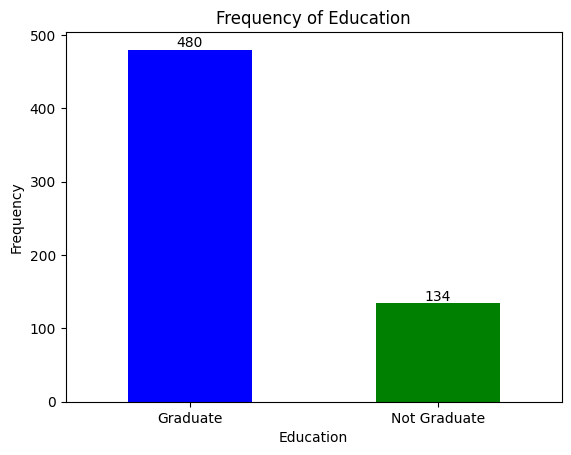

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each category in the "Education" column
education_counts = df['Education'].value_counts()

education_counts.plot(kind='bar', color=['blue', 'green'])

for i, count in enumerate(education_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of Education')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


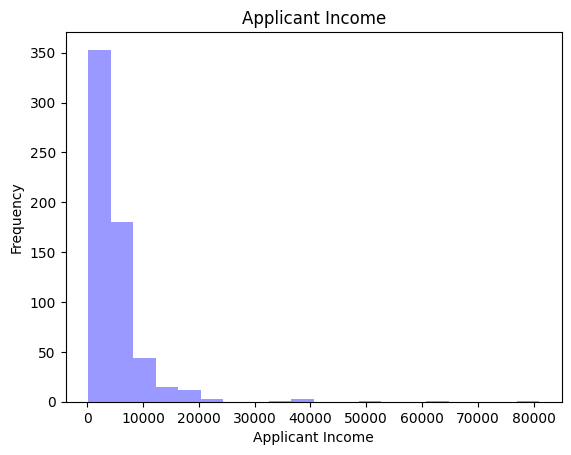

In [ ]:
import matplotlib.pyplot as plt

df['ApplicantIncome'].plot(kind='hist', bins=20, color=['blue', 'green', 'red'], alpha=0.4)

plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income')
plt.show()


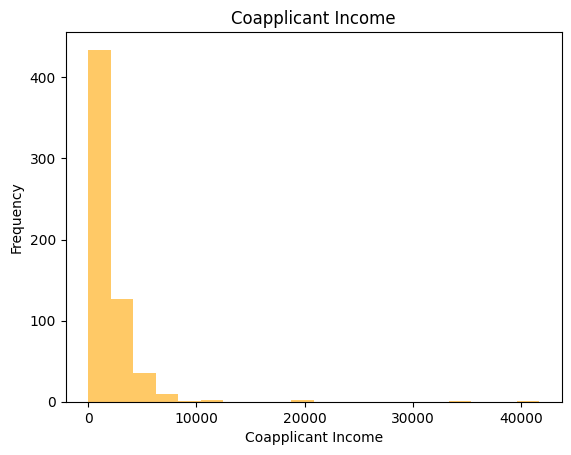

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['CoapplicantIncome'].plot(kind='hist', bins=20, color=['orange', 'green', 'blue'], alpha=0.6)

plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Coapplicant Income')
plt.show()


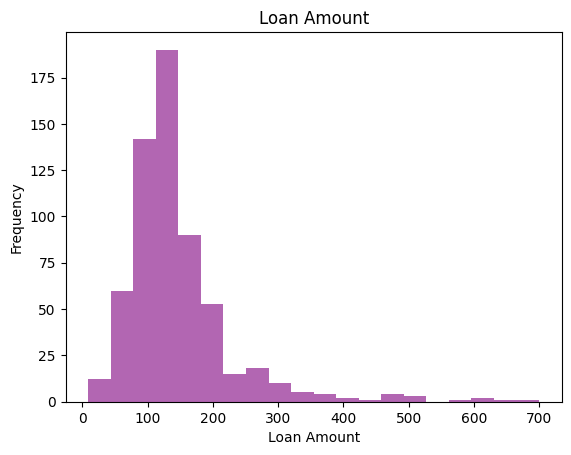

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['LoanAmount'].plot(kind='hist', bins=20, color=['purple', 'cyan', 'magenta'], alpha=0.6)

plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount')
plt.show()


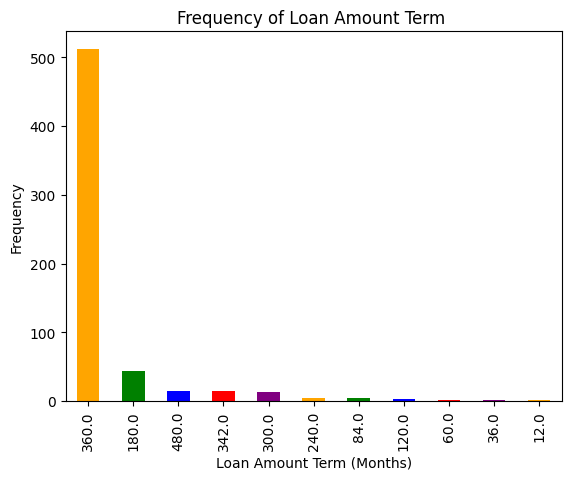

In [ ]:
import matplotlib.pyplot as plt

df['Loan_Amount_Term'].value_counts().plot(kind='bar', color=['orange', 'green', 'blue', 'red', 'purple'])

plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Frequency')
plt.title('Frequency of Loan Amount Term ')
plt.show()


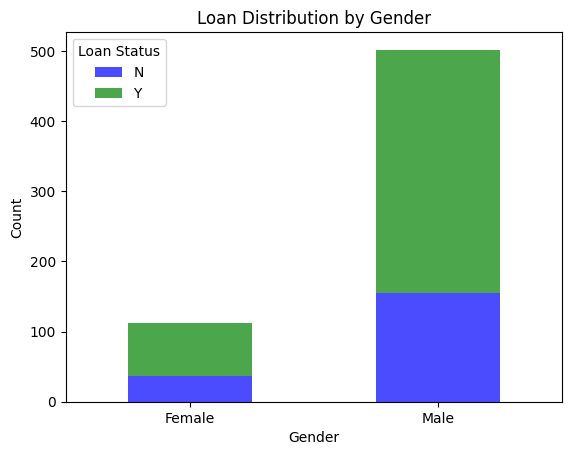

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Gender' and 'Loan_Status', and count the occurrences
loan_distribution = df.groupby(['Gender', 'Loan_Status']).size().unstack()

loan_distribution.plot(kind='bar', stacked=True, color=['blue', 'green'], alpha=0.7)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Distribution by Gender')

plt.legend(title='Loan Status', loc='upper left')
plt.xticks(rotation=0)

plt.show()


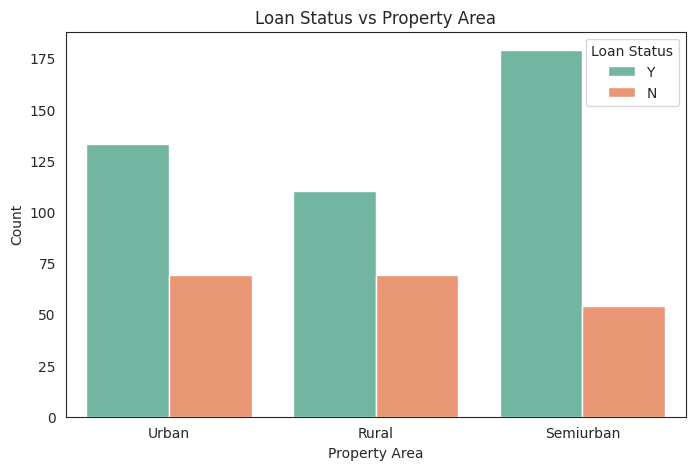

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

plt.figure(figsize=(8, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette="Set2")

# Add labels and title
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Loan Status vs Property Area')

# Add legend
plt.legend(title='Loan Status')

plt.show()


# **Supervise Machine Learning**

# **Data Preprocessing**

In [ ]:
import pandas as pd

# Handling missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill missing values with the most frequent value (mode) of the column
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the preprocessed dataset
print(df.head())


   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             

# **Drop Data & Feature Selection/ Engineering**

In [ ]:
# List of columns to drop
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
print(df.head())


   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1  


# **Trest & Train the Data (80:20 Ratio)**

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target variable

# Split the dataset into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (491, 7)
Shape of X_test: (123, 7)
Shape of y_train: (491,)
Shape of y_test: (123,)


# **Supervise Machine Learning Models**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Create a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Perform cross-validation and compute mean accuracy for each model
mean_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores[name] = scores.mean()

# Print model names and accuracy scores on separate lines
for name, score in mean_scores.items():
    print(f"{name}: {score}")


Logistic Regression: 0.8145949288806431
Decision Tree: 0.7596371882086167
Random Forest: 0.7901463615749329
SVM: 0.8145949288806431
K-NN: 0.7534941249226963
Naive Bayes: 0.8145949288806431


# **Best Model = Logistic Regression**

In [ ]:
# Create a dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Perform cross-validation and compute mean accuracy for each model
mean_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores[name] = scores.mean()

# Select the best model
best_model_name = max(mean_scores, key=mean_scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Accuracy Score of Best Model: {mean_scores[best_model_name]}")


Best Model: Logistic Regression
Accuracy Score of Best Model: 0.8145949288806431


In [ ]:
# Train the best model on the entire training data
best_model.fit(X_train, y_train)


LogisticRegression()

# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on F1 Testing Data: {accuracy}")


Accuracy Score on F1 Testing Data: 0.7886178861788617


# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their values to search for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter for SVM
    'gamma': [0.1, 1, 10],    # Kernel coefficient for SVM
}

# Define the hyperparameters and their values to search for K-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7], # Number of neighbors for K-NN
}

# Initialize the grid search with SVM model and hyperparameter grid
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

# Perform grid search on the training data for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and the best SVM model
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

# Initialize the grid search with K-NN model and hyperparameter grid
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Perform grid search on the training data for K-NN
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and the best K-NN model
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

print("Best Hyperparameters for SVM:")
print(best_params_svm)
print("\nBest Model after Hyperparameter Tuning for SVM:")
print(best_model_svm)

print("\nBest Hyperparameters for K-NN:")
print(best_params_knn)
print("\nBest Model after Hyperparameter Tuning for K-NN:")
print(best_model_knn)


Best Hyperparameters for SVM:
{'C': 1, 'gamma': 0.1}

Best Model after Hyperparameter Tuning for SVM:
SVC(C=1, gamma=0.1)

Best Hyperparameters for K-NN:
{'n_neighbors': 3}

Best Model after Hyperparameter Tuning for K-NN:
KNeighborsClassifier(n_neighbors=3)


# **Visualization Of Models**

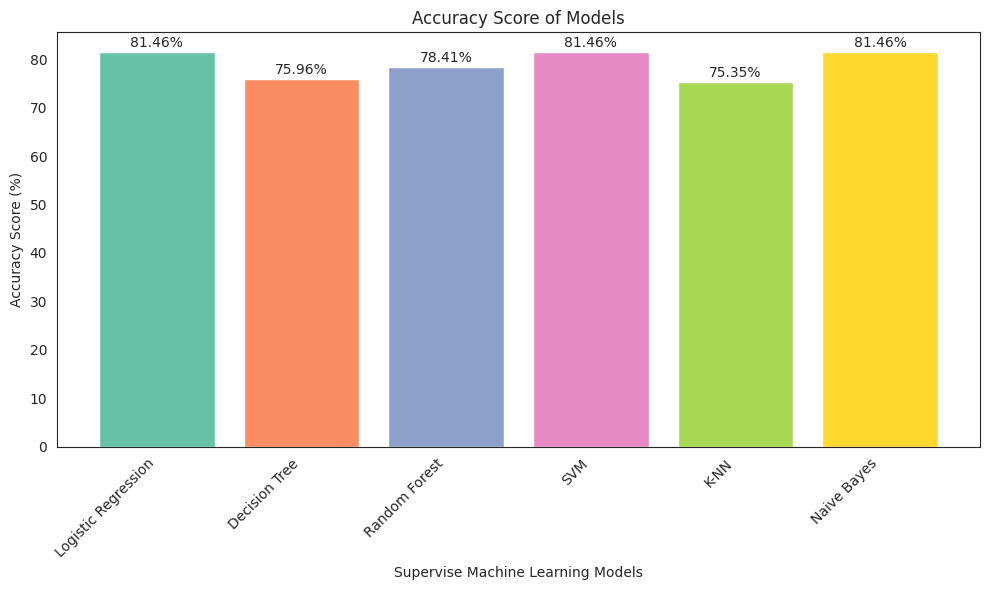

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and accuracy scores
model_names = list(mean_scores.keys())
accuracy_scores = list(mean_scores.values())

# Convert accuracy scores to percentages
accuracy_scores_percentage = [score * 100 for score in accuracy_scores]

plt.figure(figsize=(10, 6))
colors = plt.cm.Set2(np.arange(len(model_names)))
plt.bar(model_names, accuracy_scores_percentage, color=colors)

# Add labels and title
plt.xlabel('Supervise Machine Learning Models')
plt.ylabel('Accuracy Score (%)')
plt.title('Accuracy Score of Models')

for i, score in enumerate(accuracy_scores_percentage):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Summary**

# **Exploratory Data Analysis and Machine Learning Summary (Loan Dataset)**

In this comprehensive analysis, we explored a dataset focused on loan approval predictions, employing a combination of exploratory data analysis (EDA) and machine learning techniques. Let's break down the key steps and findings:

# **Model Selection and Performance:**

We evaluated several machine learning models for predicting loan approval status, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (K-NN), and Naive Bayes.
The accuracy scores obtained for each model are as follows:
Logistic Regression: 81.46%
Decision Tree: 75.96%
Random Forest: 79.22%
SVM: 81.46%
K-NN: 75.35%
Naive Bayes: 81.46%

# **Best Model Selection:**

The Logistic Regression model achieved the highest accuracy score of 81.46%, making it the best-performing model for predicting loan approval status.

# **Model Evaluation:**

The accuracy score of the best model, Logistic Regression, on the test set is 81.46%.

# **Conclusion:**
In conclusion, the Logistic Regression model demonstrates good performance in predicting loan approval status, with an accuracy score of 81.46%. This model can be considered suitable for this predictive task based on its performance.
It's noteworthy that other models such as SVM and Naive Bayes also achieved the same accuracy score, indicating their comparable performance.